# Capstone Project - Battle of the Neighborhoods in Mumbai 
### Applied Data Science Capstone offered  by IBM/Coursera, project created by *Arunit Maity*

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for opening a restaurant. Specifically, this report will be targeted to stakeholders interested in opening any **food-joint/restaurant** in **Mumbai**, Maharashtra, India.

Since there are lots of restaurants in Mumbai we will try to detect **locations that are not already crowded with restaurants**. We are also particularly interested in **neighborhoods which are similar to the best neighborhoods in terms of amenities**. We would also prefer locations **as close to city center as possible**, assuming that first two conditions are met.

We will use our data science technical expertise to generate a few most promising neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* variety of restaurants in the neighborhood, if any
* distance of neighborhood from city center

Neighborhoods have been defined based on names of post offices as given in the form of a table in the website : http://pincode.india-server.com/cities/mumbai/   

Following data sources will be needed to extract/generate the required information:
* names of all neighborhoods (post office names) will be extracted from the above mentioned website using **Pandas package in python**
* approximate addresses of centers of these neighborhoods will be obtained using **GeoPy Geocoder package in python**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**


## Methodology <a name="methodology"></a>
In the cells below the following format of the project will be followed in order to explore the **neighborhoods in Mumbai** and try to analyse and suggest an optimal location for opening a food-joint/restaurant.
1. Get list of all neighborhoods from the website listing **names of postal offices** all over Mumbai. 
2. Obtain **latitudes and longitudes** for all these neighborhoods.
3. Check for any **outliers**, i.e. postal office names which aren't within 25Kms from the centre of Mumbai and remove these data points.
4. Send **GET requests to Foursquare API** to get list of venues (maximum 100) within the vicinity of all neighbrhoods (vicinity is defined within a radium of 1000m from the neighborhood).  
5. Remove all neighborhoods which do not have more than 20 venues in their vicinities since there isn't enough data for accurate clustering using K-Means Clustering.
6. **One-hot encode** the data and feed the dataframe to K-Means clustering Algorithm to form 10 clusters from the list of available neighborhoods.
7. Create visualizations using the cluster number of all neighborhoods to better understand the data create valuable insights. Here, we try to find out the best neighborhoods amongst the available list of neighborhoods and try to identify it's cluster.
8. Again send **GET requests to Foursquare API** to get list of venues (maximum 100) of **'section = food'** to obtain only venues related to food joints within the vicinity of all selected neighborhoods (vicinity is defined within a radius of 1000m from the neighborhood). 
9. Create visualizations to find out which neighborhoods have maximum food joints and which ones have maximum types of food joints.
10. Suggest optimal locations for opening a restaurant based on all the statistical analysis done.

### Import all required packages

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import requests
import seaborn as sns
import matplotlib.pyplot as plt

Read table from website to get names of **neighborhoods**

In [2]:
table = pd.read_html('http://pincode.india-server.com/cities/mumbai/')

In [3]:
table[1]

List of all Mumbai post offices with pincode                     \
                                           S.No.        Post office   
0                                            1.0   A I Staff Colony   
1                                            2.0   Aareymilk Colony   
2                                            3.0           Agripada   
3                                            4.0            Airport   
4                                            5.0           Ambewadi   
..                                           ...                ...   
234                                        235.0       Worli Colony   
235                                        236.0         Worli Naka   
236                                        237.0  Worli Police Camp   
237                                        238.0              Worli   
238                                        239.0     Worli Sea Face   

                         
    Office type Pincode  
0           S.O  400029  
1           S.O  400065  
2           S.O  400011  
3           S.O  400099  
4           S.O  400004  
..          ...     ...  
234         S.O  400030  
235         S.O  400018  
236         S.O  400030  
237         S.O  400018  
238         S.O  400030  

[239 rows x 4 columns]

In [4]:
table[1].columns

MultiIndex([('List of all Mumbai post offices with pincode',       'S.No.'),
            ('List of all Mumbai post offices with pincode', 'Post office'),
            ('List of all Mumbai post offices with pincode', 'Office type'),
            ('List of all Mumbai post offices with pincode',     'Pincode')],
           )

In [5]:
t = table[1].drop([('List of all Mumbai post offices with pincode',       'S.No.'),
            ('List of all Mumbai post offices with pincode', 'Office type'),
            ('List of all Mumbai post offices with pincode',     'Pincode')],axis = 1)

In [6]:
t.columns

MultiIndex([('List of all Mumbai post offices with pincode', 'Post office')],
           )

In [7]:
table = pd.DataFrame()
table

""


In [8]:
table['Neighborhood_Names'] = t[('List of all Mumbai post offices with pincode', 'Post office')]

Store the names of all the **neighborhoods** in a list

In [9]:
table = table['Neighborhood_Names'].to_list()
table

['A I Staff Colony',
 'Aareymilk Colony',
 'Agripada',
 'Airport',
 'Ambewadi',
 'Andheri East',
 'Andheri',
 'Andheri Railway Station',
 'Antop Hill',
 'Anushakti Nagar',
 'Asvini',
 'Audit Bhavan',
 'Azad Nagar',
 'B P T Colony',
 'B.N. Bhavan',
 'B.P.Lane',
 'Bandra West',
 'Bandra(East)',
 'Bangur Nagar',
 'BARC',
 'Barve Nagar',
 'Bazargate',
 'Best Staff Colony',
 'BEST STaff Quarters',
 'Bhandup Complex',
 'Bhandup East',
 'Bhandup Ind. Estate',
 'Bhandup West',
 'Bharat Nagar',
 'Bhawani Shankar Rd',
 'Bhawani Shankar',
 'Borivali East',
 'Borivali',
 'Borivali West',
 'BPC Jacob Circle',
 'C G S Colony',
 'Central Building',
 'Century Mill',
 'Chakala Midc',
 'Chamarbaug',
 'Charkop',
 'Charni Road',
 'Chaupati',
 'Chembur Extension',
 'Chembur',
 'Chembur Rs',
 'Chinchbunder',
 'Chinchpokli',
 'Chunabhatti',
 'Churchgate',
 'Colaba Bazar',
 'Colaba',
 'Cotton Exchange',
 'Cumballa Hill',
 'Cumballa Sea Face',
 'D.M. Colony',
 'Dadar Colony',
 'Dadar',
 'Dahisar RS',
 'Dahisar

Create a dataframe consisting of 3 columns - **name**, **latitude** and **longitude** for each and every neighborhood:

In [13]:
df = pd.DataFrame(columns=['name','latitude','longitude'])
df

,name,latitude,longitude


Use **GeoPy** to obtain **gps coordinates** for every neighborhood: 

In [14]:
for x in table:
    try:
        address = x + ', Maharashtra, India'
        geolocator = Nominatim(user_agent="mumbai_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df = df.append({'name':x,'latitude':latitude,'longitude':longitude},ignore_index=True)
    except:
        print('EXCEPTION!! No coordinates found for :'+address)

EXCEPTION!! No coordinates found for :A I Staff Colony, Maharashtra, India
EXCEPTION!! No coordinates found for :Aareymilk Colony, Maharashtra, India
EXCEPTION!! No coordinates found for :Audit Bhavan, Maharashtra, India
EXCEPTION!! No coordinates found for :Bazargate, Maharashtra, India
EXCEPTION!! No coordinates found for :BEST STaff Quarters, Maharashtra, India
EXCEPTION!! No coordinates found for :Bhandup Ind. Estate, Maharashtra, India
EXCEPTION!! No coordinates found for :Bhawani Shankar Rd, Maharashtra, India
EXCEPTION!! No coordinates found for :BPC Jacob Circle, Maharashtra, India
EXCEPTION!! No coordinates found for :C G S Colony, Maharashtra, India
EXCEPTION!! No coordinates found for :Chaupati, Maharashtra, India
EXCEPTION!! No coordinates found for :Chembur Extension, Maharashtra, India
EXCEPTION!! No coordinates found for :Chembur Rs, Maharashtra, India
EXCEPTION!! No coordinates found for :Colaba Bazar, Maharashtra, India
EXCEPTION!! No coordinates found for :Cumballa Se

In [15]:
df

,name,latitude,longitude
0,Agripada,18.975302,72.824898
1,Airport,21.086220,79.063768
2,Ambewadi,16.715835,74.204431
3,Andheri East,19.115883,72.854202
4,Andheri,19.119698,72.846420
...,...,...,...
167,Wadala,19.026919,72.875934
168,Wadala Truck Terminal,19.034708,72.876617
169,Worli Colony,19.022352,72.832755
170,Worli,19.011696,72.818070


### Plot all neighborhoods as circle markers onto the map of **Mumbai**

In [16]:
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[19.351471, 72.956750], zoom_start=6)

# add markers to map
for lat,lng,label in zip(df['latitude'],df['longitude'],df['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  

    folium.Circle(
        [19.103341,72.8826362],
        radius=26000,
        popup='Relevant Areas of Mumbai',
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.005,
        parse_html=False).add_to(map_mumbai)     
    
map_mumbai

#### Shade areas under which we want to search for neighborhoods in red in the above map. 
Areas relevant to us are those which are within a 25Km radius from the centre of Mumbai

In [17]:
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[19.1009521,72.874236], zoom_start=10)

# add markers to map
for lat,lng,label in zip(df['latitude'],df['longitude'],df['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  

    folium.Circle(
        [19.103341,72.8826362],
        radius=25500,
        popup='Relevant Areas of Mumbai',
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.005,
        parse_html=False).add_to(map_mumbai)     
    
map_mumbai

Calculate distance of all neighborhoods from the centre of Mumbai and add them to the dataframe **'df'**

In [18]:
from geopy.distance import distance
centre = (19.103341,72.8826362)
l = []
for x in range(df.shape[0]):
    lat = df.iloc[x]['latitude']
    lng = df.iloc[x]['longitude']
    l.append(distance(centre,(lat,lng)).km)

In [19]:
df['dist_from_centre']=l

In [20]:
df.sort_values(['dist_from_centre'],inplace = True)
df.reset_index(inplace = True,drop = True)

In [21]:
df.tail()

,name,latitude,longitude,dist_from_centre
167,Kurla North,20.743602,79.002970,665.951993
168,Girgaon,20.476663,79.094238,668.346226
169,Airport,21.086220,79.063768,682.625657
170,Null Bazar,21.093128,79.680494,744.183547
171,Goregaon,21.292963,80.190110,801.169344


##### Filter out neighborhoods which are more than 25Kms away from the centre of the city

In [22]:
df_final = df[df['dist_from_centre']<=25]

In [23]:
df_final

,name,latitude,longitude,dist_from_centre
0,Sakinaka,19.100090,72.881478,0.379917
1,Marol Naka,19.108156,72.879478,0.628107
2,Barve Nagar,19.095283,72.900178,2.050079
3,B P T Colony,19.101937,72.861599,2.219168
4,International Airport,19.090201,72.863808,2.457877
...,...,...,...,...
140,Mantralaya,18.927662,72.827039,20.308105
141,V K Bhavan,18.926926,72.823050,20.510702
142,Nariman Point,18.925951,72.823208,20.608386
143,Colaba,18.915091,72.825969,21.675108


##### Plot final map with only relevant neighborhoods

In [24]:
# create map of Toronto using latitude and longitude values
map_mumbai = folium.Map(location=[19.103341,72.8826362], zoom_start=10)

# add markers to map
for lat,lng,label in zip(df_final['latitude'],df_final['longitude'],df_final['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  

map_mumbai

#### Foursquare API
Print Foursquare API Credentials:

In [25]:
CLIENT_ID = '3SSGSPUECSZI3XKCU0PTTNPQHAXLGAIHD3WLWHAWKAJ1SAC2' # your Foursquare ID
CLIENT_SECRET = 'K5P5E15RWELKDOYI4L443JDJA20I3WNWTCK5SWUWFHNAGHVN' # your Foursquare Secret
VERSION = '20200704' # Foursquare API version

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 3SSGSPUECSZI3XKCU0PTTNPQHAXLGAIHD3WLWHAWKAJ1SAC2
CLIENT_SECRET:K5P5E15RWELKDOYI4L443JDJA20I3WNWTCK5SWUWFHNAGHVN


Define function to request Foursquare API to return **100 nearest venues (within a 1000m radius)** from given neighborhood's latitude and longitude:

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call function and create dataframe to store all relevant data from Foursqaure API's response pertaining to venues near a neighborhood for each and every neighborhood

In [27]:
mumbai_venues = getNearbyVenues(names=df_final['name'],
                                   latitudes=df_final['latitude'],
                                   longitudes=df_final['longitude']
                                  )

Sakinaka
Marol Naka
Barve Nagar
B P T Colony
International Airport
Chakala Midc
Seepz
Ghatkopar West
Andheri East
Rajawadi
M.P.T.
Nehru Road
Nagardas Road
Vakola
Pant Nagar
NITIE
Tilak Nagar
Jogeshwari East
Andheri Railway Station
Andheri
Kurla
Powai Iit
Vikhroli
Chembur
Santacruz Central
Santacruz(East)
Bharat Nagar
Azad Nagar
Stock Exchange
Santacruz(West)
Tagore Nagar
Bandra(East)
Juhu
Sindhi Society
Chunabhatti
Jogeshwari West
Kherwadi
J.B. Nagar
Kannamwar Nagar
Shivaji Nagar
S V Marg
Govandi
Vihar Road
Sion
Danda
Dharavi Road
Dharavi
Best Staff Colony
Bhandup West
Bhandup Complex
Oshiwara
Bandra West
Motilal Nagar
Wadala Truck Terminal
Nagari Niwara
Goregaon East
Mori Road
Anushakti Nagar
Usha Nagar
Bhandup East
Tank Road
Wadala
Nahur
Bangur Nagar
Mahul Road
Matunga
Antop Hill
Rani Sati Marg
Malad East
Shivaji Park
Malad
Dadar Colony
Trombay
Ranade Road
Mulund Colony
Dadar
Liberty Garden
Worli Colony
Mulund West
BARC
Gokhale Road
Bhawani Shankar
Kidwai Nagar
Orlem
Mulund East
Mhad

In order for **efficient clustering**, we need a minimum of 20 venues for each neighborhood because otherwise there isn't sfficient data for making any accurate analysis. Thus we obtain names of neighborhoods with more than 20 venues in their vicininty:

In [28]:
temp = mumbai_venues.groupby('Neighborhood').count().sort_values(['Venue'])[mumbai_venues.groupby('Neighborhood').count().sort_values(['Venue'])['Venue']>=20]
temp.reset_index(inplace = True)

In [29]:
temp

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Worli Sea Face,20,20,20,20,20,20
1,Sindhi Society,21,21,21,21,21,21
2,Mulund Colony,21,21,21,21,21,21
3,Ghatkopar West,21,21,21,21,21,21
4,Worli,22,22,22,22,22,22
...,...,...,...,...,...,...,...
98,Nariman Point,100,100,100,100,100,100
99,V K Bhavan,100,100,100,100,100,100
100,Churchgate,100,100,100,100,100,100
101,Bandra West,100,100,100,100,100,100


Create list **final_names** to store names of all neighborhoods with more than 20 venues in their vicinity: 

In [30]:
final_names = temp['Neighborhood'].to_list()

Create dataframe **final_mumbai_venues** to store data pertaining to only those neighborhoods which have more than 20 venues in their vicinity: 

In [31]:
final_mumbai_venues = pd.DataFrame()
for x in range(mumbai_venues.shape[0]):
    if(mumbai_venues.iloc[x]['Neighborhood'] in final_names):
        final_mumbai_venues = final_mumbai_venues.append(mumbai_venues.iloc[x])

In [32]:
final_mumbai_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Sakinaka,19.100090,72.881478,JW Marriott Mumbai Sahar,Hotel,19.102502,72.878236
1,Sakinaka,19.100090,72.881478,J W Cafe,Restaurant,19.103212,72.877504
2,Sakinaka,19.100090,72.881478,Starbucks: A Tata Alliance,Coffee Shop,19.099318,72.874339
3,Sakinaka,19.100090,72.881478,The Bar Stock Exchange,Pub,19.105542,72.884159
4,Sakinaka,19.100090,72.881478,Romano's,Italian Restaurant,19.103115,72.877408
...,...,...,...,...,...,...,...
5573,Colaba,18.915091,72.825969,Bentley's Hotel,Hotel,18.919641,72.830861
5574,Colaba,18.915091,72.825969,Di Bella,Coffee Shop,18.918652,72.830413
5575,Colaba,18.915091,72.825969,Village,Indian Restaurant,18.914541,72.818211
5576,Colaba,18.915091,72.825969,Garage Inc. Public House,Cocktail Bar,18.919511,72.830323


Sort dataframe alphabetically using neighborhood names: 

In [33]:
final_mumbai_venues = final_mumbai_venues.sort_values(['Neighborhood']).reset_index(drop = True)

## K-Means Clustering
First, the dataframe **final_mumbai_venues** is one-hot encoded to convert all venue categories into categorical variables

In [34]:
# one hot encoding
mumbai_onehot = pd.get_dummies(final_mumbai_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood_Name'] = final_mumbai_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

In [35]:
mumbai_onehot.head()

,Neighborhood_Name,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
mumbai_onehot.shape

(5200, 234)

In order to create a dataframe with features which can be fed to the K-Means Clustering algorithm, the onehot-encoded dataframe is grouped into rows pertaining to each neighborhood with the mean values of all the columns:

In [37]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood_Name').mean().reset_index()
mumbai_grouped = mumbai_grouped.sort_values(['Neighborhood_Name'])
mumbai_grouped

,Neighborhood_Name,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Agripada,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.027778,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0
1,Andheri,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.034483,0.0,0.00,0.0,0.000000,0.000000,0.0
2,Andheri East,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.050000,0.0,0.00,0.0,0.000000,0.000000,0.0
3,Andheri Railway Station,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.034483,0.0,0.00,0.0,0.000000,0.000000,0.0
4,Azad Nagar,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.029412,0.0,0.00,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Tulsiwadi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.020408,0.0,0.020408,0.0,0.00,0.0,0.000000,0.000000,0.0
99,V K Bhavan,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.010000,...,0.0,0.000000,0.0,0.010000,0.0,0.01,0.0,0.010000,0.000000,0.0
100,Worli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.045455,0.045455,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.045455,0.0
101,Worli Colony,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.017241,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.017241,0.000000,0.0


Sort dataframe alphabetically using neighborhood names: 

In [38]:
df_final = df_final.sort_values(['name']).reset_index(drop = True)
df_final

,name,latitude,longitude,dist_from_centre
0,Agripada,18.975302,72.824898,15.421206
1,Andheri,19.119698,72.846420,4.218935
2,Andheri East,19.115883,72.854202,3.298365
3,Andheri Railway Station,19.119698,72.846420,4.218935
4,Antop Hill,19.020761,72.865256,9.322289
...,...,...,...,...
140,Wadala,19.026919,72.875934,8.488710
141,Wadala Truck Terminal,19.034708,72.876617,7.623501
142,Worli,19.011696,72.818070,12.210406
143,Worli Colony,19.022352,72.832755,10.389105


The dataframe **df_final** is restricted to only those rows which contain neighborhoods with more than 20 venues in their vicinity:

In [39]:
l = []
for x in range(df_final.shape[0]):
    l.append(df_final.iloc[x]['name'] in final_names)

In [40]:
df_final = df_final[l].reset_index(drop = True)
df_final

,name,latitude,longitude,dist_from_centre
0,Agripada,18.975302,72.824898,15.421206
1,Andheri,19.119698,72.846420,4.218935
2,Andheri East,19.115883,72.854202,3.298365
3,Andheri Railway Station,19.119698,72.846420,4.218935
4,Azad Nagar,19.128315,72.840038,5.266106
...,...,...,...,...
98,Tulsiwadi,18.973423,72.818156,15.902341
99,V K Bhavan,18.926926,72.823050,20.510702
100,Worli,19.011696,72.818070,12.210406
101,Worli Colony,19.022352,72.832755,10.389105


The **K-Means** clustering algorithm is deployed to cluster all 102 neighborhoods into 10 clusters:


In [41]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 10
mumbai_grouped_clustering = mumbai_grouped.drop('Neighborhood_Name', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 3, 4, 2, 7, 4, 2, 4, 2])

The Cluster Number is added to the dataframe **df_final** 

In [42]:
df_final['Cluster_Number'] = kmeans.labels_
df_final

,name,latitude,longitude,dist_from_centre,Cluster_Number
0,Agripada,18.975302,72.824898,15.421206,3
1,Andheri,19.119698,72.846420,4.218935,4
2,Andheri East,19.115883,72.854202,3.298365,3
3,Andheri Railway Station,19.119698,72.846420,4.218935,4
4,Azad Nagar,19.128315,72.840038,5.266106,2
...,...,...,...,...,...
98,Tulsiwadi,18.973423,72.818156,15.902341,3
99,V K Bhavan,18.926926,72.823050,20.510702,2
100,Worli,19.011696,72.818070,12.210406,0
101,Worli Colony,19.022352,72.832755,10.389105,8


###### Plot map of Mumbai portraying all neighborhoods based on clusters
All the neighbrhoods are color coded on the basis of their cluster number and popup labels are assigned to show the name of the neighborhood and it's cluster number.

In [43]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[19.103341, 72.8826362], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['latitude'], df_final['longitude'], df_final['name'], df_final['Cluster_Number']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Copy the color coding scheme for the clusters into the variable **clr** for future use to plot various visualizations

In [44]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
cluster = []
for x in final_names:
    cluster.append(int(df_final[df_final['name']==str(x)]['Cluster_Number']))
clr = []
for x in cluster:
    clr.append(rainbow[x-1])

## Analysis: <a name="analysis"></a>

Calculate the number of **unique venue categories (amenities)** in each neighborhood. This measure can be used to analyse the hierarchy of neighborhood. This means that we can assume that neighborhoods with a large number of amentites are the best neighborhoods in Mumbai.

In [45]:
y_values = []
for x in final_names:
    y_values.append(len(mumbai_venues[mumbai_venues['Neighborhood']==str(x)]['Venue Category'].unique()))

##### Plot the number of unique venue categories (amenities) for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood. 

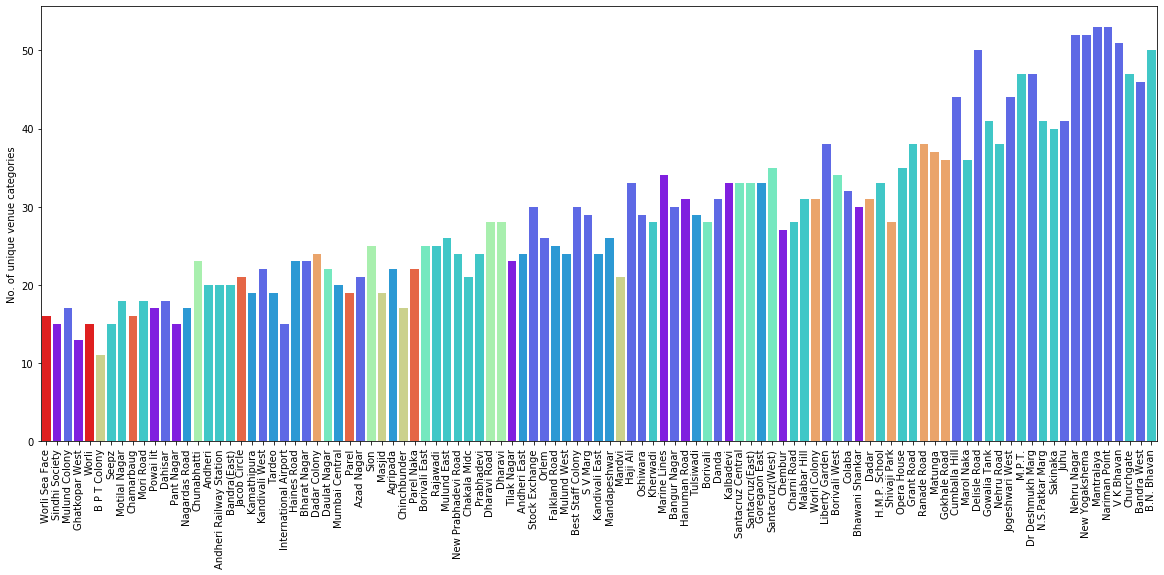

In [46]:
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('No. of unique venue categories')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

From the plot, we can conclude that clusters pertaining to **Nariman Point** and **B.N. Bhavan**,i.e. cluster number 2 and 4 respectively can definitely be considered the best clusters since they consist of neighborhoods with the highest number of amenities. 

Calculate the number of **unique venues** in each neighborhood. This measure is indicative of how saturated a certain area is with respect to venues. It can be assumed that scope of success of a new venture would be less in a neighborhood already filled with a large number of venues.

In [50]:
y_values = []
for x in final_names:
    y_values.append(len(mumbai_venues[mumbai_venues['Neighborhood']==str(x)]['Venue'].unique()))

##### Plot the number of unique venues for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood. 

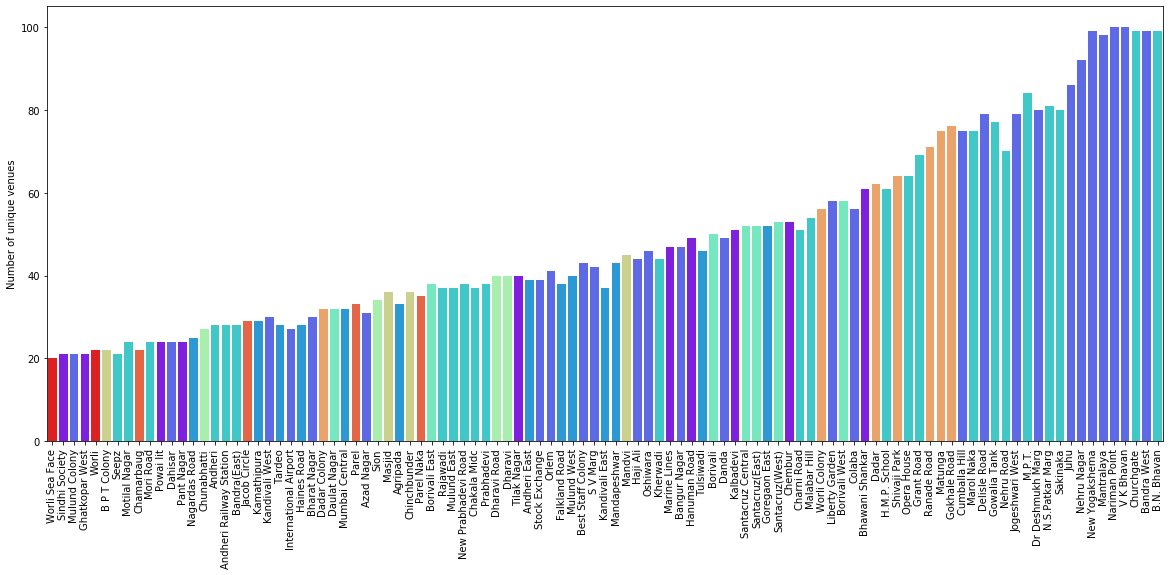

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('Number of unique venues')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

#### Food-joints / Restaurants Analysis
We shall now send GET requests to the **Foursquare API** for getting response data pertaining to only venues related to food such as food-joints and restaurants (maximum = 100) within the vicinity (1000m radius from neighborhood) of the neighborhood. This data will then be further analysed to generate food-specific insights.

Define function to request Foursquare API to return **100 nearest venues related to food (within a 1000m radius)** from given neighborhood's latitude and longitude:

In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call function and create dataframe to store all relevant data from Foursqaure API's response pertaining to venues related to food near a neighborhood for each and every neighborhood

In [53]:
mumbai_venues = pd.DataFrame()
mumbai_venues = getNearbyVenues(names=df_final['name'],
                                   latitudes=df_final['latitude'],
                                   longitudes=df_final['longitude']
                                  )

Agripada
Andheri
Andheri East
Andheri Railway Station
Azad Nagar
B P T Colony
B.N. Bhavan
Bandra West
Bandra(East)
Bangur Nagar
Best Staff Colony
Bharat Nagar
Bhawani Shankar
Borivali
Borivali East
Borivali West
Chakala Midc
Chamarbaug
Charni Road
Chembur
Chinchbunder
Chunabhatti
Churchgate
Colaba
Cumballa Hill
Dadar
Dadar Colony
Dahisar
Danda
Daulat Nagar
Delisle Road
Dharavi
Dharavi Road
Dr Deshmukh Marg
Falkland Road
Ghatkopar West
Gokhale Road
Goregaon East
Gowalia Tank
Grant Road
H.M.P. School
Haines Road
Haji Ali
Hanuman Road
International Airport
Jacob Circle
Jogeshwari West
Juhu
Kalbadevi
Kamathipura
Kandivali East
Kandivali West
Kherwadi
Liberty Garden
M.P.T.
Malabar Hill
Mandapeshwar
Mandvi
Mantralaya
Marine Lines
Marol Naka
Masjid
Matunga
Mori Road
Motilal Nagar
Mulund Colony
Mulund East
Mulund West
Mumbai Central
N.S.Patkar Marg
Nagardas Road
Nariman Point
Nehru Nagar
Nehru Road
New Prabhadevi Road
New Yogakshema
Opera House
Orlem
Oshiwara
Pant Nagar
Parel
Parel Naka
Powai 

In [54]:
mumbai_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agripada,18.975302,72.824898,Celejor,18.975844,72.823679,Bakery
1,Agripada,18.975302,72.824898,Neel,18.980407,72.820403,Indian Restaurant
2,Agripada,18.975302,72.824898,Sigdi Restaurant,18.970523,72.831034,Indian Restaurant
3,Agripada,18.975302,72.824898,Persian Darbar,18.976055,72.833643,Indian Restaurant
4,Agripada,18.975302,72.824898,Gloria Restaurant,18.975485,72.833884,Asian Restaurant
...,...,...,...,...,...,...,...
4618,Worli Sea Face,19.005470,72.813674,Tastee,18.999275,72.816955,Fast Food Restaurant
4619,Worli Sea Face,19.005470,72.813674,Fishland,18.998818,72.817330,Seafood Restaurant
4620,Worli Sea Face,19.005470,72.813674,Banjara,19.006259,72.821605,Restaurant
4621,Worli Sea Face,19.005470,72.813674,Mahindra Holidays Cafeteria,19.005692,72.822309,Snack Place


Calculate the number of **unique venue categories related to food** in each neighborhood.

In [55]:
y_values = []
for x in final_names:
    y_values.append(len(mumbai_venues[mumbai_venues['Neighborhood']==str(x)]['Venue Category'].unique()))

##### Plot the number of unique venue categories related to food for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood. 

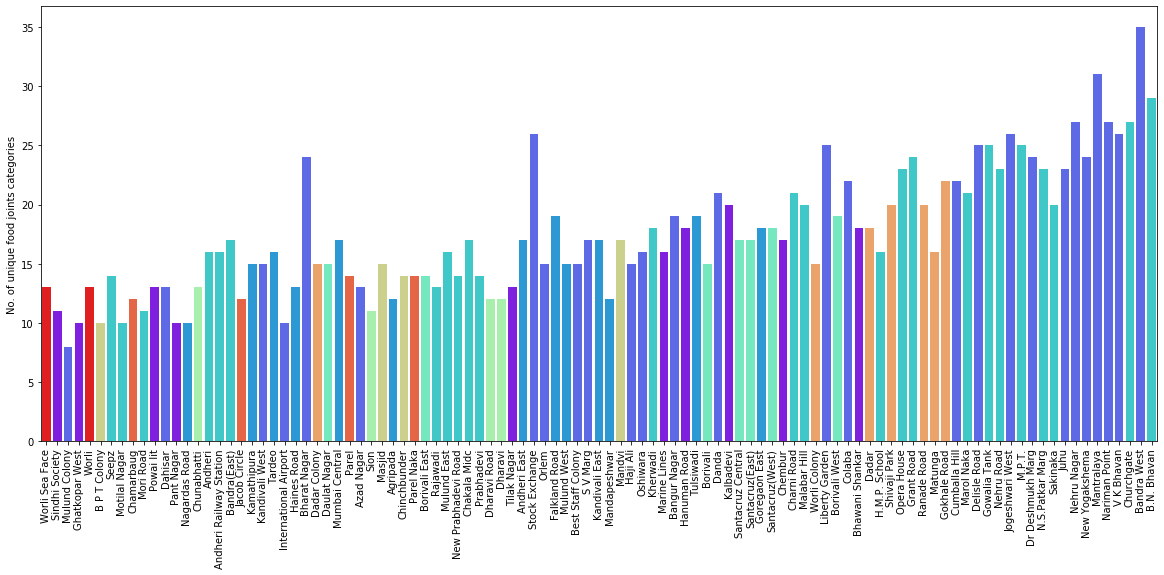

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('No. of unique food joints categories')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

Calculate the number of **unique venues related to food** in each neighborhood.

In [57]:
y_values = []
for x in final_names:
    y_values.append(len(mumbai_venues[mumbai_venues['Neighborhood']==str(x)]['Venue'].unique()))

##### Plot the number of unique venues related to food for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood. 

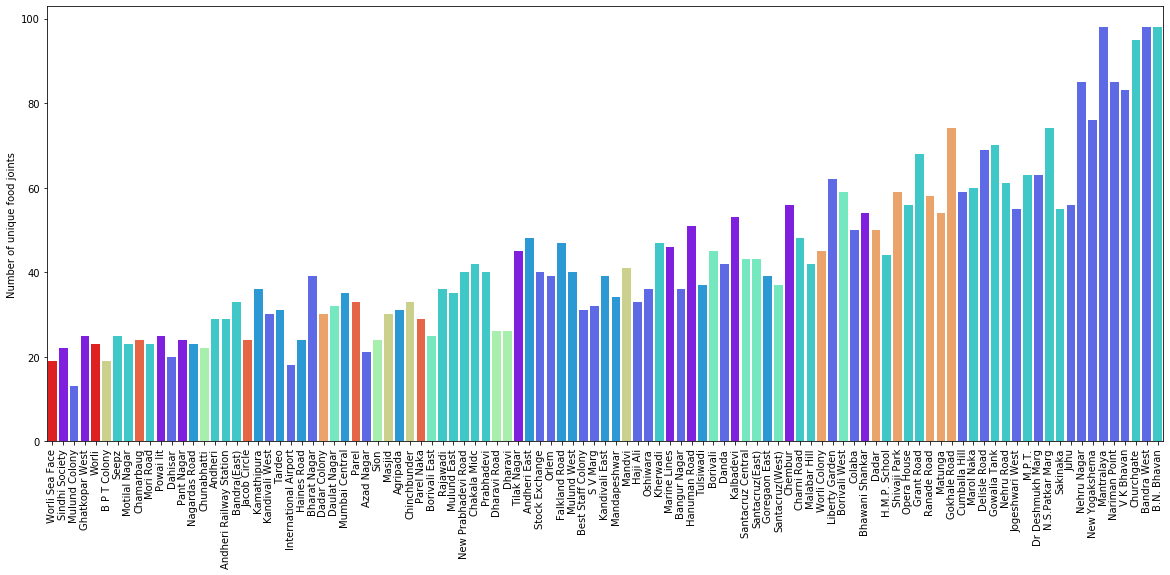

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('Number of unique food joints')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

## Results and Discussion <a name="results"></a>


Based on the barplot showing the **number of unique venue categories** for each neighborhood, we concluded that clusters pertaining to **Nariman Point** and **B.N. Bhavan**,i.e. cluster numbers 2 and 4 respectively can definitely be considered the best clusters since they consist of neighborhoods with the highest number of amenities. 

   Thus, prospective stakeholders would like to open up their restaurant in similar neighborhoods since they have the largest customer base and also have a huge demand. However, it is possible that these neighborhoods might be saturated with venues. Therefore, we also look at the plot showing the **number of unique venues** for each and every neighborhood. Here we see that the while the best neighborhoods in terms of amenities such as **Churchgate, Nariman Point, Bandra West B.N. Bhavan etc** are saturated with a large number of venues, there exist neighborhoods which are part of the same cluster yet have lesser number of venues. These neighborhoods might be optimal for opening up restaurants since they fall to the same cluster and are therefore similar to neighborhoods with highest amenities yet have less number of venues.
    
   Instead of looking at the **total number of venues** of a certain neighborhood to determine the saturation, it would be better to simply look at the **total number of food joints / restaurants** in that neighborhood. Thus, we look at the barplot showing the number of unique venue categories pertaining to food for each neighborhood. We can see that our inital assumption is still correct and neighborhoods in cluster 2 and 4 have the highest variety of food joints are thereby considered the best neighborhoods.
   
   So the optimal location to open up restaurants in Mumbai would be neigborhoods in the *best clusters* i.e. clusters 2 and 4 with the least number of existing food joints. The ideal candidate neighborhoods can be seen from the plot of **number of unique venues related to food** for every neighborhood. Here we see that the neighborhoods with the least number of foodjoints belonging to cluster 2 and 4 are:
   1. Mulund Colony	
   2. Dahisar
   3. Motilal Nagar
   4. Mori Road
   5. International Airport

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify areas/neighborhoods in Mumbai close to the city-center with low number of restaurants in order to aid stakeholders in narrowing down the search for optimal location for opening of a food-joint/restaurant. By calculating venue density distribution from Foursquare data we have first identified general clusters that justify further analysis and created groups of similar neighborhoods, and then generated extensive visualizations to justify how good a certain cluster is based on characteristics(no. of amenities) of the neighborhoods in the clusters. 

Then the Foursquare data was again used in order to find venues pertaining to food for all the neighborhoods to determine the saturation of a neighborhood with respect to foodjoints. Optimal locations were identified as those neighborhoods which are part of the best clusters(having neighborhoods with maximum amenities) yet have the least number of food joints. The optimal locations obtained are:
   1. Mulund Colony	
   2. Dahisar
   3. Motilal Nagar
   4. Mori Road
   5. International Airport

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and their locations, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.